In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplot
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap
import os
import subprocess
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
 
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

import random
   
import csv
import openpyxl




from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist 
 
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.backend import clear_session





import pickle 

from shap import TreeExplainer, Explanation
from shap.plots import waterfall
import shap
print(shap.__version__)


import lime
from lime import lime_tabular
import random

import dalex as dx 

from tabulate import tabulate 
 
# Define custom metrics
recall = Recall()
precision = Precision() 
auc = AUC()



0.44.0


In [2]:
dataSetIndex = 6
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./heartDisease/0_statLog_dataSet.csv"
    dataSetName = "SateLog_DataSet"
elif (dataSetIndex == 1):
    dataSetFilePath = "./heartDisease/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./heartDisease/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./heartDisease/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./heartDisease/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./heartDisease/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./heartDisease/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

print("Shape of fileData: {}".format(fileData.shape))
print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))


missingValues = fileData.isnull().any().sum()
print(f"\nNumber of Missing Values: {missingValues}")

num_rows_before = fileData.shape[0]
# Remove duplicate records based on all columns
fileData.drop_duplicates(inplace=True)
# Check the number of rows after removing duplicates
num_rows_after = fileData.shape[0]
# Print the number of duplicate records removed
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate records removed: {num_duplicates_removed}")
 
 # Preprocess Steps from the ChatGPT
# 1. Handling Missing Values:
fileData = fileData.dropna()
print("Shape of fileData: {}".format(fileData.shape))              
#fileData.replace({'?': np.nan}).dropna().astype(float)
#fileData = fileData.fillna(0) 

fileData = fileData.fillna(0) 

print("Shape of fileData End: {}".format(fileData.shape))

finalResultTable = [ ['Index', 'Method', 'Accuracy %','Recall %','Precision %','F1 Score','AUC'], ]  


X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
X = X.drop('Gender', axis=1)  # Features
#cols = ['Gender', 'Age','Annual-Family-Income', 'Cholesterol', 'Diabetes', 'Triglycerides', 'Red-Cell-Distribution-Width', 'X60-sec-pulse', 'Height', 'Albumin', 'Blood-Rel-Stroke', 'Blood-Rel-Diabetes', 'HDL', 'Moderate-work','Iron', 'Hemoglobin','Protein', 'SEQN'   ] 
#cols = ['Age','Gender','Blood-Rel-Stroke','Triglycerides','Blood-Rel-Diabetes','Cholesterol','Platelet-count','Diabetes','Albumin','Hemoglobin','Moderate-work','Diastolic','Protein','Height','X60-sec-pulse','White-Blood-Cells','Bilirubin','Hematocrit','HDL','Systolic' ] 
#X = fileData[cols]

Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())

print("\n")
print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))

dataSetResultDirectory = "./"
dataSetResultDirectory += ("DatasetResults_MLP_SMOTE_April_24")
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)

dataSetName += "_{}".format(fileData.shape)



Shape of fileData: (37079, 40)
Column Headings: Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Height', 'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte',
       'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Segmented-Neutrophils', 'Hematocrit', 'Albumin',
       'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'Iron',
       'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke',
       'CoronaryHeartDisease'],
      dtype='object')
Number of Records: 37079

Number of Missing Values: 0
Number of duplicate records removed: 0
Shape of fileData: (37079, 40)
Shape of fileData End: (37079, 40)


columns of x:: 38 

 and features of X: Index(['Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight', 'Height',
       'Body-Mass-Index', 'Wh

In [3]:
print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))



rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
ada = ADASYN(sampling_strategy='auto', random_state=42)
  
# Oversample the minority class using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, Y)  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)
 

print("Target Column Name:: {} \n".format(fileData.__dataframe__().column_names()[-1]))

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("\n X Train: Shape:: {}".format(X_train.shape))
print(" X Test: Shape:: {}".format(X_test.shape))  
 
 
positiveClass =  0
negativeClass = 0
for i in y_train:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Train DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Train DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Train DataSet Total Records:: {}".format(positiveClass + negativeClass)) 

print("\n\n") 


positiveClass =  0
negativeClass = 0
for i in y_test:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Test DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Test DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Test DataSet Total Records:: {}".format(positiveClass + negativeClass)) 



Shape of fileData: (37079, 40) , target Len:37079
X: (37079, 38) , Y:(37079,)


Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "c:\Users\Mubashir Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Target Column Name:: CoronaryHeartDisease 


 X Train: Shape:: (56913, 38)
 X Test: Shape:: (14229, 38)
Train DataSet Positive Class Records:: 28457
Train DataSet Negative Class Records:: 28456
Train DataSet Total Records:: 56913



Test DataSet Positive Class Records:: 7114
Test DataSet Negative Class Records:: 7115
Test DataSet Total Records:: 14229


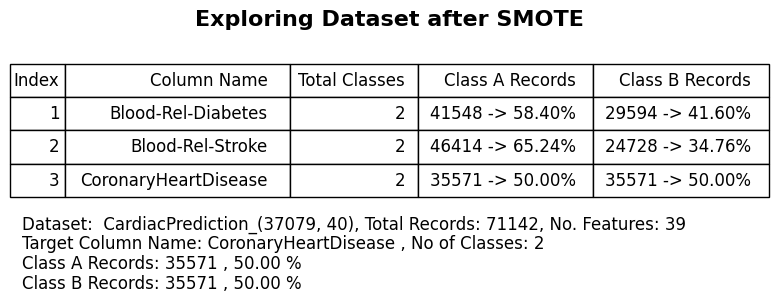

In [4]:
columnsForGraph = []
columnsForGraph.clear()
tableDataRow = []


# Concatenate feature and target data for both training and testing sets
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

columns = df_combined.__dataframe__().column_names() 
totalRecords = (df_combined.__dataframe__().num_rows())
for column in columns:
    singleColumnCount = df_combined[column].value_counts()
    if(len(singleColumnCount) < 3):
        #print('Column Name:{} -> total records:{}'.format(column, totalRecords ) )
        #print('Number of classes:', len(singleColumnCount))
        #print('Class distribution:')
        #print(singleColumnCount)
        #print("np Array: {}".format(np.array(singleColumnCount)))
        #print("index: 0: {} -> {} %".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100))
        #print("index: 1: {} -> {} %".format(np.array(singleColumnCount)[1], ( np.array(singleColumnCount)[1] /totalRecords) * 100))  
        #print('---------------------------------------------------------------')
        columnsForGraph.append(column)
 
tableDataRow = [ ['Index', 'Column Name', 'Total Classes','Class A Records','Class B Records'], ]

indexx = 1
for column in columnsForGraph:
    singleColumnCount = df_combined[column].value_counts()
    singleRowInTable = [] 
    singleRowInTable.append(indexx)
    singleRowInTable.append(column)
    singleRowInTable.append(len(singleColumnCount))
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[1], (np.array(singleColumnCount)[1] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    indexx += 1
    tableDataRow.append(singleRowInTable) 

 
# Determine the number of rows in the table (excluding the header)
num_rows = len(tableDataRow) + 1
# Calculate the desired figure size based on the number of rows
fig_width = 6  # Set the desired width of the figure
fig_height = num_rows * 0.5  # Adjust the scaling factor to control the height

fig, ax = mplot.subplots(figsize=(fig_width, fig_height)) 
table = mplot.table(cellText=tableDataRow, loc='center') 

table.auto_set_column_width(col=list(range(len(tableDataRow[0]))))

table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0) 

dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, totalRecords, df_combined.__dataframe__().num_columns())
target ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(df_combined[columns[-1]].value_counts()))
distributionOfTargetClassA ="Class A Records: {} , {:.2f} %".format(np.array(df_combined[columns[-1]].value_counts())[0], (np.array(df_combined[columns[-1]].value_counts())[0] /totalRecords) * 100)
distributionOfTargetClassB ="Class B Records: {} , {:.2f} %".format(np.array(df_combined[columns[-1]].value_counts())[1], (np.array(df_combined[columns[-1]].value_counts())[1] /totalRecords) * 100)

fig.text(-0.1, +0.10,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, +0.02,  target, horizontalalignment='left', wrap=False  , fontsize=12 )   
fig.text(-0.1, -0.06,  distributionOfTargetClassA, horizontalalignment='left', wrap=False , fontsize=12  )   
fig.text(-0.1, -0.14,  distributionOfTargetClassB, horizontalalignment='left', wrap=False  , fontsize=12 )   

remarks = "You need to distribute the target class in equal number of records in training-set."
#fig.text(-0.2, -0.15,  remarks, horizontalalignment='left', wrap=True ,fontsize=12, fontweight='bold' )   
 
mplot.axis('off')
mplot.title(f'Exploring Dataset after SMOTE' ,fontsize=16, fontweight='bold') 
picturePath = "{}02.DataSet_analysis_After_dataAugmentation_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.savefig(picturePath,  dpi=300 )
mplot.show()
mplot.close()

In [4]:
X_train_normalized = tf.keras.utils.normalize(X_train, axis=1)
X_test_normalized = tf.keras.utils.normalize(X_test, axis=1)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test) 
# Our vectorized labels

X_train_f32 = np.asarray(X_train).astype(np.float32)  #.astype('float32').reshape((-1,1))
X_test_f32 = np.asarray(X_test).astype(np.float32)

#y_train_scaler = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_scaler = np.asarray(y_test).astype('float32').reshape((-1,1))

 

# Separate features and target variable
features = X_train_scaler # data.iloc[:, :-1]
target = np.asarray(y_train).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']
 
 

print("X_train shape: {}   and dType: {}".format(X_train.shape, len(X_train.columns)))
print("X_train_scaler shape: {}   and dType: {}".format(X_train_scaler.shape, X_train_scaler.dtype))
print("X_test_scaler shape: {}   and dType: {}".format(X_test_scaler.shape, X_test_scaler.dtype)) 


print("y_train shape: {}   and dType: {}".format(y_train.shape, y_train.dtype))  
print("y_test_scaler shape: {}   and dType: {}".format(y_test_scaler.shape, y_test_scaler.dtype))  


print("features shape: {}   and dType: {}".format(features.shape, features.dtype))
print("target shape: {}   and dType: {}".format(target.shape, target.dtype)) 

X_train shape: (56913, 38)   and dType: 38
X_train_scaler shape: (56913, 38)   and dType: float64
X_test_scaler shape: (14229, 38)   and dType: float64
y_train shape: (56913,)   and dType: int64
y_test_scaler shape: (14229, 1)   and dType: float32
features shape: (56913, 38)   and dType: float64
target shape: (56913, 1)   and dType: float64


Number of Node: 19
Number 2 of Node: 25.0
GPU detected, using GPU for training.
Epoch 1/10
2277/2277 [==============================] - 40s 17ms/step - loss: 0.4909 - accuracy: 0.7804 - recall_1: 0.8114 - precision_1: 0.7640 - auc_1: 0.8494
Epoch 2/10
2277/2277 [==============================] - 39s 17ms/step - loss: 0.4148 - accuracy: 0.8159 - recall_1: 0.8566 - precision_1: 0.7921 - auc_1: 0.8881
Epoch 3/10
2277/2277 [==============================] - 35s 15ms/step - loss: 0.3807 - accuracy: 0.8340 - recall_1: 0.8725 - precision_1: 0.8101 - auc_1: 0.9067
Epoch 4/10
2277/2277 [==============================] - 33s 14ms/step - loss: 0.3676 - accuracy: 0.8398 - recall_1: 0.8751 - precision_1: 0.8174 - auc_1: 0.9137
Epoch 5/10
2277/2277 [==============================] - 34s 15ms/step - loss: 0.3554 - accuracy: 0.8466 - recall_1: 0.8839 - precision_1: 0.8225 - auc_1: 0.9191
Epoch 6/10
2277/2277 [==============================] - 33s 14ms/step - loss: 0.3494 - accuracy: 0.8487 - recall_1:

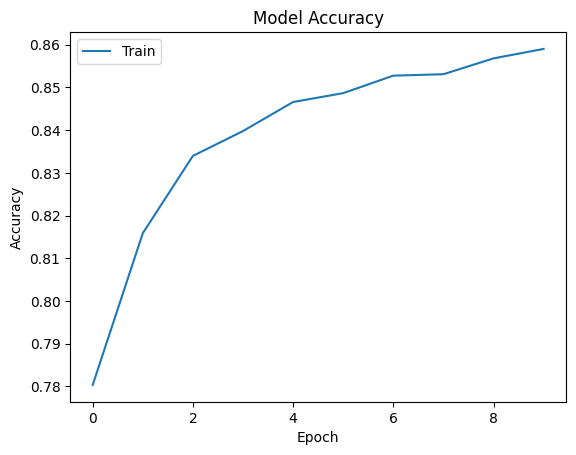

445/445 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7115
           1       0.84      0.90      0.87      7114

    accuracy                           0.87     14229
   macro avg       0.87      0.87      0.87     14229
weighted avg       0.87      0.87      0.87     14229

Final Test Results:
Accuracy: 0.3144
Recall: 0.8678
Precision: 0.9020


In [6]:
tf.keras.backend.clear_session()
# Train and evaluate the model
epochs = 10
batch_size = 25

history = 0
model = 0
binary_predictions = 0
method = "MLP"

# Define the attention layer
print("Number of Node: {}".format(features.shape[1]//2))
print("Number 2 of Node: {}".format(features.shape[1]//1.5))
 

def optimize_for_gpu(model):
    # Leverage GPU if available
    if tf.config.list_physical_devices('GPU'):
        print("GPU detected, using GPU for training.")
        with tf.device("/GPU:0"):
            model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', Recall(), Precision(), AUC()])  # Add custom metrics
    else:
        print("GPU not detected, using CPU for training.")
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', Recall(), Precision(), AUC()])  # Add custom metrics

def train_evaluate_model(X_train, X_test, y_train, y_test, model, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    # Evaluate on test set
    test_acc, test_recall, test_precision, test_f1, test_auc = model.evaluate(X_test, y_test)
    print("Test Accuracy:", test_acc)
    print("Test Recall:", test_recall)
    print("Test Precision:", test_precision)
    print("Test F1 Score:", test_f1)
    print("Test AUC:", test_auc)

    
    # Plot training history (optional)
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    

    # Print classification report (optional)
    y_pred = model.predict(X_test)
    binary_predictions = [1 if prob >= 0.5 else 0 for prob in y_pred]
    # Now, you can use classification_report
    print(classification_report(y_test, binary_predictions))

    return test_acc, test_recall, test_precision, test_f1, test_auc, history, binary_predictions


if __name__ == "__main__":
    # ... your data preprocessing and oversampling steps (replace placeholders)

    # Define the model (consider hyperparameter tuning)
    input_layer = Input(shape=(X_train.shape[1],))

    # Traditional neural network part (adjust based on your analysis)
    x = layers.Dense(X_train.shape[1] * 2, activation='relu')(input_layer)
    x = layers.Dense(X_train.shape[1], activation='relu')(x)
    x = layers.Dense(X_train.shape[1], activation='relu')(x)
    x = layers.Dense(X_train.shape[1] // 2, activation='relu')(x)

    # Output layer
    output_layer = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    # Clear session to avoid memory issues
    clear_session()
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', Recall(), Precision(), AUC()])  # Add custom metrics

    # Optimize for GPU or CPU
    optimize_for_gpu(model)
    test_acc, test_recall, test_precision, test_f1, test_auc, history, binary_predictions = train_evaluate_model(X_train, X_test, y_train, y_test, model, epochs, batch_size)

    # Print final results and consider saving the model for future use
    print("Final Test Results:")
    print(f"Accuracy: {test_acc:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print

 


In [21]:
csvPath = "{}Model_training_accuracy_and_evaluations_{}_{}_Epoch_{}.xlsx".format(dataSetResultDirectory, method, dataSetName, epochs)

# Create a new workbook
wb = openpyxl.Workbook()
ws = wb.active  # Get the active worksheet

str22 = (classification_report(y_test, binary_predictions))
 
str22.strip() 
str22.replace(" ", ",")
print(str22)
print("-------------=-=-=-=----------------")
data_lines = str22.splitlines()  # Split by newlines
str22 = str("\n\n\n Training accuracy:\n"  )
data_lines += str22.splitlines()  # Split by newlines
str22 = str(history.history['accuracy'])
str22.strip() 
str22.replace(" ", ",")
str22.replace("[", "")
str22.replace("]", "")
print(str22)
print("-------------=-=-=-=----------------")
data_lines += str22.splitlines()  # Split by newlines

print(data_lines)
# Split each line into a list (comma-separated values)
xlsFileData = [line.split(",") for line in data_lines]
# Write the data to the worksheet, starting from row 1
for row_index, row in enumerate(xlsFileData):
    for col_index, value in enumerate(row):
        ws.cell(row=row_index + 1, column=col_index + 1).value = value

# Save the workbook
wb.save(csvPath)

 

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7115
           1       0.84      0.90      0.87      7114

    accuracy                           0.87     14229
   macro avg       0.87      0.87      0.87     14229
weighted avg       0.87      0.87      0.87     14229

-------------=-=-=-=----------------
[0.7803665399551392, 0.815876841545105, 0.8339746594429016, 0.8397905826568604, 0.8465903997421265, 0.8486637473106384, 0.8527576923370361, 0.8530915379524231, 0.8567989468574524, 0.8590129017829895]
-------------=-=-=-=----------------
['              precision    recall  f1-score   support', '', '           0       0.89      0.83      0.86      7115', '           1       0.84      0.90      0.87      7114', '', '    accuracy                           0.87     14229', '   macro avg       0.87      0.87      0.87     14229', 'weighted avg       0.87      0.87      0.87     14229', '', '', '', ' Training accuracy:', '[0.780366539

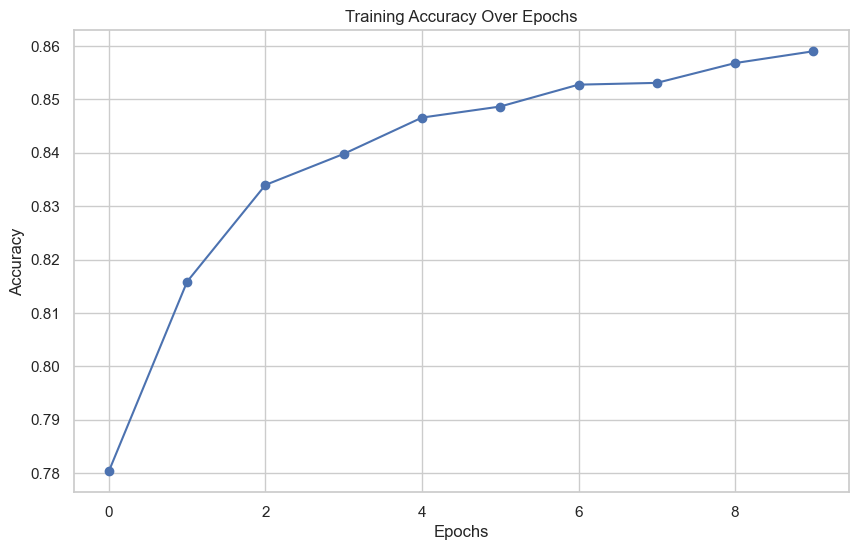

In [22]:
# Plotting training accuracy
numberOfEpochs = epochs
batchSizeOfTraining = batch_size

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='b')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
picturePath = "{}3.Model_training_Accuracy_{}_epoches_{}.png".format(dataSetResultDirectory, dataSetName, numberOfEpochs)
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [25]:
# Evaluate the model using the evaluate method
y_test_float64 = np.asarray(y_test).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']
model2 = model
accuracy, recall_value, precision_value, f1_score_value, auc_value = model.evaluate(X_test_scaler, y_test_float64)

# Print the results
#print('Test loss: {}'.format(loss*100))
print('Test accuracy: {}'.format(accuracy*100))
print('Test recall: {}'.format(recall_value*100))
print('Test precision: {}'.format(precision_value*100))
print('Test F1 score: {}'.format(f1_score_value*100))
print('Test AUC: {}'.format(auc_value*100))


picturePath = "{}Model_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, "Testing_Accuracy", dataSetName, numberOfEpochs)


445/445 [==============================] - 4s 9ms/step - loss: 0.6165 - accuracy: 0.7537 - recall_1: 0.6912 - precision_1: 0.7899 - auc_1: 0.8218
Test accuracy: 61.64625883102417
Test recall: 75.36720633506775
Test precision: 69.11723613739014
Test F1 score: 78.98795008659363
Test AUC: 82.18499422073364


In [26]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall_1', 'precision_1', 'auc_1'])


0.8678075912985016
[0.       0.166409 1.      ]
[0.         0.90202418 1.        ]
[inf  1.  0.]


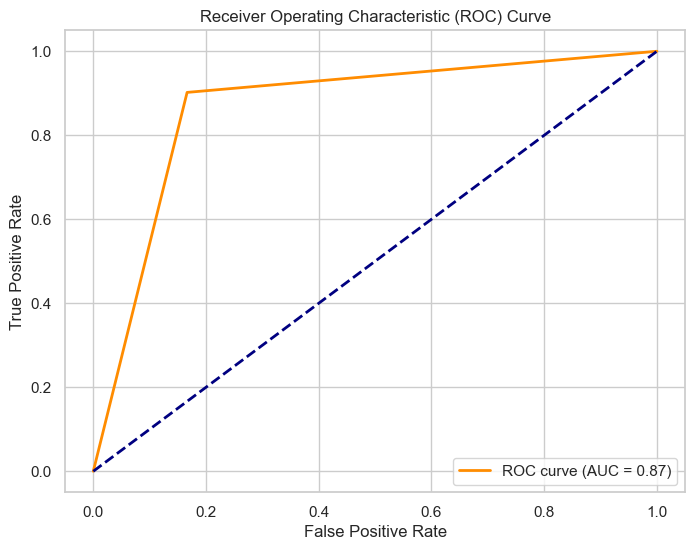

In [30]:
# Calculate AUC
auc_score = roc_auc_score(y_test, binary_predictions)
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, binary_predictions)

print(auc_score)
print(fpr)
print(tpr)
print(_)


# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

picturePath = "{}Model_Evaluation_ROC_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')

plt.show()
plt.close()




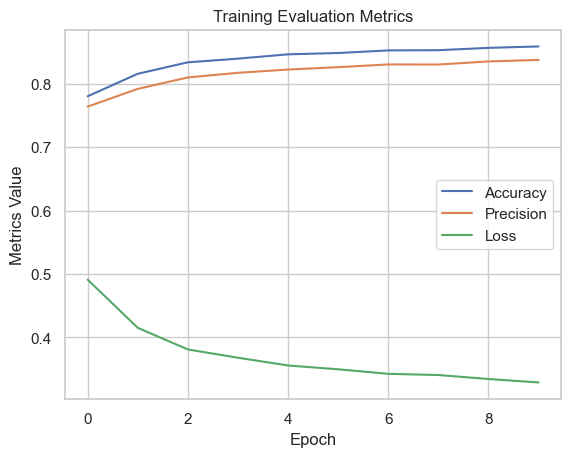

In [31]:
# Plot Testing accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['precision_1'], label='Precision')
plt.plot(history.history['loss'], label='Loss')

# Set plot labels and title
plt.title('Training Evaluation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')

# Add legend
plt.legend()

picturePath = "{}Model_Training_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, "MLP", dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')

plt.show()
plt.close()


In [32]:
percentage = 0.07
numberOfFeatures = int(len(features) *percentage)
print("Total Features: {} -> Selected for SHAP:: {}".format(len(features), numberOfFeatures))
featuresForShap = X_train.columns #features[0:numberOfFeatures]
#print(" Features Name: {}".format(  featuresForShap))

numberOftest = int(len(X_test_scaler) * percentage)
print("Total Test: {} -> Selected for SHAP:: {}".format(len(X_test_scaler), numberOftest))
testForShap = X_test_scaler[0:len(featuresForShap)]
testForShap = X_test_scaler[0:numberOftest]
#print(" testForShap Name: {}".format(  testForShap))



Total Features: 56913 -> Selected for SHAP:: 3983
Total Test: 14229 -> Selected for SHAP:: 996


# shap.DeepExplainer

In [33]:
with tf.device("/GPU:0"):
    deepExplainer = shap.DeepExplainer(model, features[0:int(numberOftest*20)])
    deepTestValues =  testForShap[0:int(numberOftest)] 
    deepShap_values = deepExplainer.shap_values(deepTestValues)



Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [36]:
deepShap_array = np.array(deepShap_values) 
mean_abs_shap_values = np.mean(np.abs(deepShap_array), axis=(0, 1)) 
sorted_indices = np.argsort(mean_abs_shap_values)[::-1] 
sorted_feature_names = np.array(X.columns.to_list())[sorted_indices]

sorted_shap_values = deepShap_array[:, sorted_indices].T
#print(sorted_shap_values) 
deepShapValuesPlot = mean_abs_shap_values[sorted_indices]

str22 = 0
csvPath = "{}Model_SHAP_DeepExplainer_FeatureRanking_{}_{}_Epoch_{}.xlsx".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
str22 = str("DeepExplainer Top Feature List\n")
indexx = 1
for feature, mean_shap_value in zip(sorted_feature_names, mean_abs_shap_values[sorted_indices]):
        str22 += str(f"{indexx}, {feature}, {mean_shap_value} \n") 
        indexx += 1

# Create a new workbook
wb = openpyxl.Workbook()
ws = wb.active  # Get the active worksheet
data_lines = str22.splitlines()  # Split by newlines
 
# Split each line into a list (comma-separated values)
xlsFileData = [line.split(",") for line in data_lines] 
for row_index, row in enumerate(xlsFileData):
    for col_index, value in enumerate(row):
        ws.cell(row=row_index + 1, column=col_index + 1).value = value

# Save the workbook
wb.save(csvPath)

print("DeepExplainer Top Feature List")
print("--------------------------------")
for feature, mean_shap_value in zip(sorted_feature_names, mean_abs_shap_values[sorted_indices]):
    print(f"{feature}, {mean_shap_value}") 



DeepExplainer Top Feature List
--------------------------------
Blood-Rel-Stroke, 0.1309727957979379
Blood-Rel-Diabetes, 0.10745850176220893
Moderate-work, 0.10310167778141473
Diabetes, 0.09856741306451043
HDL, 0.017581547927013493
Cholesterol, 0.016502495095936525
Triglycerides, 0.014310793006464094
Total-Cholesterol, 0.01298150120521774
Age, 0.009138220954403363
Bilirubin, 0.007175635066980662
Basophils, 0.006603484087290027
Monocyte, 0.006412557892551284
Red-Blood-Cells, 0.005777524294546273
Iron, 0.005076594895219097
White-Blood-Cells, 0.0050299034751487785
Albumin, 0.0039151726792691745
Glucose, 0.003791634909147334
Glycohemoglobin, 0.002645599727778815
Platelet-count, 0.002526330343177184
Phosphorus, 0.0022381097967768657
Height, 0.0021901635716178353
ALP, 0.002156544930717155
Eosinophils, 0.0018600282669169028
Weight, 0.0018007024038468177
Lymphocyte, 0.0017949645847291588
Hemoglobin, 0.0017393293590933316
Hematocrit, 0.0017252956226025131
X60-sec-pulse, 0.0015497004484512098
Pr

In [37]:
shap.summary_plot(deepShap_values, deepTestValues, feature_names=featuresForShap, show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP DeepExplainer" ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap))
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_DeepExplainer_{}_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.show()
#os.startfile(picturePath)
mplot.close()


In [47]:
sample_to_explain = testForShap[0]  # Choose the first sample in the test set for illustration


exp = Explanation(deepShap_values[:,:,1], deepExplainer.base_values[:,1], data=testForShap, feature_names=featuresForShap)
idx = 0
waterfall(exp[idx])

TypeError: list indices must be integers or slices, not tuple

In [41]:
# Select a sample for explanation (adjust index as needed)
sample_to_explain = testForShap[0]  # Choose the first sample in the test set for illustration
print(sample_to_explain)
# Explain the sample using SHAP
shap_values = deepExplainer.shap_values(sample_to_explain[np.newaxis, ...])

# Create SHAP Waterfall plot
shap.waterfall_plot(shap_values, sample_to_explain[np.newaxis, ...], feature_names=featuresForShap)

[-3.59085709e-01  1.02533798e+00 -6.83922570e-01  6.01806296e-01
 -7.46821988e-01  4.74176024e-01 -1.04585744e+00 -5.14943840e-01
  1.38603954e+00  3.20815606e-01 -7.56811221e-01 -1.48754410e-02
 -3.68118042e-01 -1.04136864e+00 -3.14858649e-02 -1.16809637e+00
 -8.56916096e-01 -3.16305312e-01  8.68133950e-01  1.87030936e-01
  6.28842713e-01 -2.42589041e-01 -5.14533972e-01  2.50734053e-02
  1.56007209e+00 -1.75794986e+00  5.89033482e-04 -7.52790978e-01
  7.59987242e-02 -1.06549306e+00  1.95604506e-01 -4.05404642e-01
 -1.39121246e+00 -2.82003152e-01 -9.53924186e-01  5.84532340e-01
  1.18831972e+00  7.29367359e-01]


TypeError: waterfall() got an unexpected keyword argument 'feature_names'

In [44]:
import matplotlib.pyplot as plt

sample_to_explain = testForShap[0]  # Choose the first sample in the test set for illustration
print(sample_to_explain)
# Explain the sample using SHAP
shap_values = deepExplainer.shap_values(sample_to_explain[np.newaxis, ...])

# Create the waterfall plot
shap.waterfall_plot(shap_values, sample_to_explain[np.newaxis, ...])

# Get the current axis
ax = plt.gca()

# Set x-axis tick labels (assuming featuresForShap is a list of feature names)
ax.set_xticks(np.arange(len(featuresForShap)))
ax.set_xticklabels(featuresForShap, rotation=45, ha='right')

# Adjust layout to accommodate labels
plt.tight_layout()
plt.show()

[-3.59085709e-01  1.02533798e+00 -6.83922570e-01  6.01806296e-01
 -7.46821988e-01  4.74176024e-01 -1.04585744e+00 -5.14943840e-01
  1.38603954e+00  3.20815606e-01 -7.56811221e-01 -1.48754410e-02
 -3.68118042e-01 -1.04136864e+00 -3.14858649e-02 -1.16809637e+00
 -8.56916096e-01 -3.16305312e-01  8.68133950e-01  1.87030936e-01
  6.28842713e-01 -2.42589041e-01 -5.14533972e-01  2.50734053e-02
  1.56007209e+00 -1.75794986e+00  5.89033482e-04 -7.52790978e-01
  7.59987242e-02 -1.06549306e+00  1.95604506e-01 -4.05404642e-01
 -1.39121246e+00 -2.82003152e-01 -9.53924186e-01  5.84532340e-01
  1.18831972e+00  7.29367359e-01]


TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

[37 36 34 35 21 32 30 31  0 17  9 27 24 10  7]

--------------------------------------------------
Top SHAP Explainer values:
Blood-Rel-Stroke, 0.13246098928280034
Blood-Rel-Diabetes, 0.1072260294727967
Moderate-work, 0.10583512252296377
Diabetes, 0.09851529610017731
Cholesterol, 0.020847808797979553
HDL, 0.01947909085267238
Triglycerides, 0.015898844167536993
Total-Cholesterol, 0.014319149845106785
Age, 0.011144376185418867
Albumin, 0.00735435372836477
Monocyte, 0.006079852434938365
Bilirubin, 0.005405290706929976
Iron, 0.00517853877273425
Eosinophils, 0.004614148150845025
White-Blood-Cells, 0.004495449832578163
--------------------------------------------------



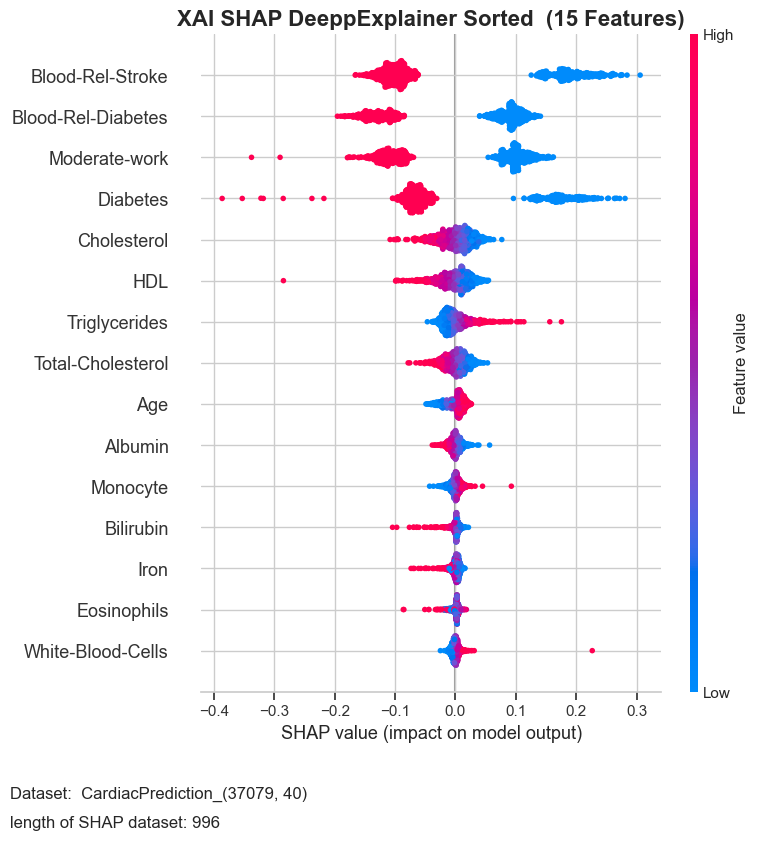

In [28]:
howManyFeatures = 15
# Calculate feature importance based on the mean absolute SHAP values
feature_importance =  np.abs(deepShap_values).mean(axis=(0, 1))
top_features_indices = np.argsort(feature_importance)[::-1][:howManyFeatures]
# Select only the top features and corresponding SHAP values
print(top_features_indices)
featureNamesSHAP = X.columns[top_features_indices]
top_features = testForShap[:, top_features_indices]
top_shap_values = deepShap_values[0][:, top_features_indices]

print("\n--------------------------------------------------") 
print("Top SHAP Explainer values:")
for i in range(len(top_features_indices)):
    feature_index = top_features_indices[i]
    feature_name = X.columns[feature_index]
    shap_value = np.mean(np.abs(top_shap_values[:, i])) 
    print(f"{feature_name}, {shap_value}")
 
print("--------------------------------------------------\n") 
 

# Plot the summary plot for the top 15 features
shap.summary_plot(top_shap_values, top_features, feature_names=featureNamesSHAP, show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP DeeppExplainer Sorted  ({} Features)".format(howManyFeatures) ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap)) 
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_DeepExplainer2_Bar_{}_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
mplot.show()
#os.startfile(picturePath)
mplot.close()

In [31]:
feature_names = X.columns.tolist() 
 
top_10_feature_names = [feature_names[i] for i in top_features_indices]
top_10_shap_values = deepShap_values[0][:, top_features_indices] 
# Create a DataFrame for visualization
df_top_10 = pd.DataFrame(data=top_10_shap_values, columns=top_10_feature_names)
# Plotting with Seaborn's violinplot
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_top_10, inner="quartile", palette="muted") 
plt.title('SHAP (DeepExplainer) Violin Plot')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_Violinplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight') 
#plt.show()
plt.close()


# Plotting a Bubble Chart
plt.figure(figsize=(12, 6))

for i, feature in enumerate(top_10_feature_names):
    size = np.abs(df_top_10[feature]) * 100  # Adjust the scale as needed
    plt.scatter(x=[i] * len(df_top_10), y=df_top_10[feature], s=size, label=feature, alpha=0.6)
 
plt.title('SHAP (DeepExplainer) Bubble Chart')
plt.xlabel('Feature Index')
plt.ylabel('SHAP Values')
plt.xticks(range(len(top_10_feature_names)), top_10_feature_names, rotation=45, ha='right')
#plt.legend()
picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_BubbleChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

# Bubble Chart   
top_10_avg_shap_values = feature_importance[top_features_indices]

# Calculate the scale for bubble size based on the average values compared to others
size_scale = np.abs(top_10_avg_shap_values) / np.max(np.abs(top_10_avg_shap_values))
# Create a DataFrame for visualization
df_top_10_avg_shap = pd.DataFrame({'Feature': top_10_feature_names, 'Average SHAP Value': top_10_avg_shap_values})
# Plotting a Bubble Chart for top 10 average SHAP values
plt.figure(figsize=(12, 6))
size = size_scale * 1000  # Adjust the scale as needed
plt.scatter(x=range(len(df_top_10_avg_shap)), y=df_top_10_avg_shap['Average SHAP Value'], s=size, alpha=0.6)

plt.title('SHAP (DeepExplainer) Bubble Chart Average')
plt.xlabel('Feature Index')
plt.ylabel('Average SHAP Values')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')
picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_BubbleChartAverage_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()


# Plotting a boxplot for the top 10 features
plt.figure(figsize=(12, 6))
x_axis_range = (-0.10, 0.10)  # Adjust the range as needed
sns.boxplot(data=df_top_10, orient='v', palette='Set2')
plt.title('SHAP (DeepExplainer) Box Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Features')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')
picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_BoxPlot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()



38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
78.6% of the points cannot be placed; you may want to d

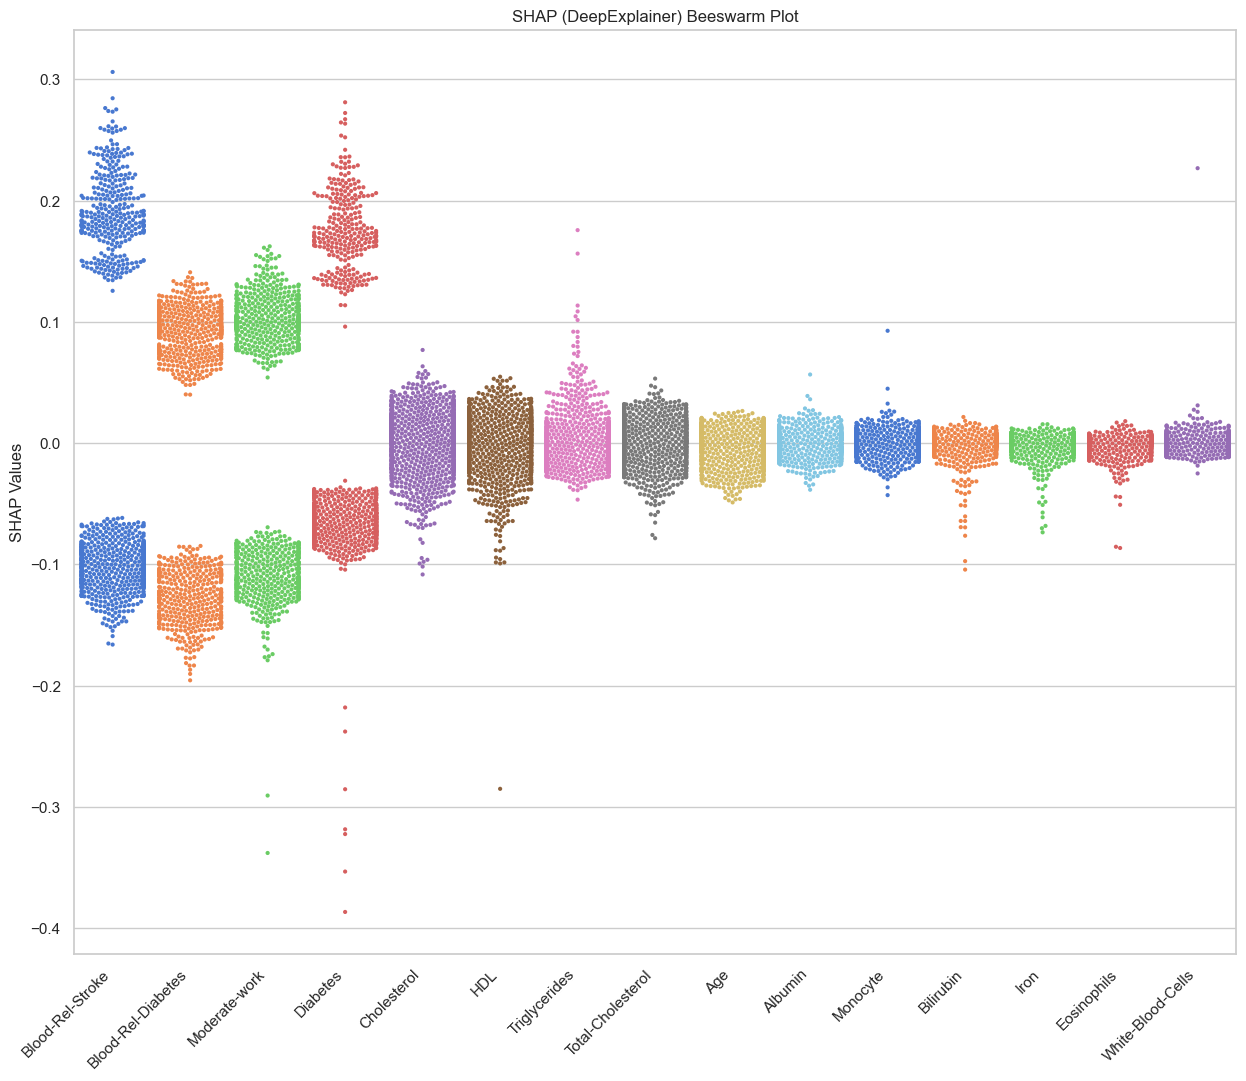

In [32]:
12 #  swarmplot (Beeswarm plot)
plt.figure(figsize=(15, 12))
sns.swarmplot(data=df_top_10, palette="muted", size=3) 
plt.title('SHAP (DeepExplainer) Beeswarm Plot')
plt.ylabel('SHAP Values')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_Beeswarmplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# shap.Explainer

In [33]:
shap_explainer = shap.Explainer(model, feature_names=featuresForShap, masker=shap.maskers.Independent(data=testForShap)) 

shap_values = shap_explainer.shap_values(testForShap)  

PermutationExplainer explainer: 997it [01:06, 14.79it/s]                         


In [36]:
# Calculate feature importance based on the mean absolute SHAP values
feature_names = X.columns.tolist()
# Calculate average SHAP values across all instances
avg_shap_values = np.mean(shap_values, axis=0) 
 
# Calculate feature importance based on the mean absolute SHAP values
feature_importance =  np.abs(shap_values).mean(axis=0)
top_features_indices = np.argsort(feature_importance)[::-1][:howManyFeatures]
# Select only the top features and corresponding SHAP values
print(top_features_indices)
featureNamesSHAP = X.columns[top_features_indices]
top_features = testForShap[:, top_features_indices]
top_shap_values = shap_values[:, top_features_indices]


csvPath = "{}Model_SHAP_KernelExplainer_FeatureRanking_{}_{}_Epoch_{}.csv".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
with open(csvPath, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows("KernalExplainer Top Feature List")
    for i in range(len(top_features_indices)):
        feature_index = top_features_indices[i]
        feature_name = feature_names[feature_index]
        shap_value = np.mean(np.abs(top_shap_values[:, i])) 
        writer.writerows(f"{feature_name}, {shap_value} \n") 


print("\n\n--------------------------------------------------") 
print("Top SHAP Explainer values:")
for i in range(len(top_features_indices)):
    feature_index = top_features_indices[i]
    feature_name = feature_names[feature_index]
    shap_value = np.mean(np.abs(top_shap_values[:, i])) 
    print(f"{feature_name}, {shap_value}")
 
 

# Plot the summary plot for the top 15 features
shap.summary_plot(top_shap_values, top_features, feature_names=featureNamesSHAP, plot_type="bar", show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP Explainer Sorted  ({} Features)".format(howManyFeatures) ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap))
shapTypeString ="SHAP Type: {}".format(repr(shap_explainer)) 
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   
ax.figure.text(0.020, -0.13,  shapTypeString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_Explainer_Bar_{}_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.show()
#os.startfile(picturePath)
mplot.close()




[37 36 34 35 21 32 30 31  0 17  9 27 24 10 11]


--------------------------------------------------
Top SHAP Explainer values:
Blood-Rel-Stroke, 0.13133969406248508
Blood-Rel-Diabetes, 0.10900227490865547
Moderate-work, 0.09933335886109906
Diabetes, 0.09644221610014367
Cholesterol, 0.021169559025983175
HDL, 0.01904696640199272
Triglycerides, 0.014645106365506692
Total-Cholesterol, 0.013549817436224004
Age, 0.009809282338568715
Albumin, 0.0067077354391332925
Monocyte, 0.00662614461361107
Bilirubin, 0.0064745727921154085
Iron, 0.005362026163542666
Eosinophils, 0.004677299081356824
Basophils, 0.00435400955599947


In [37]:
# Plot the summary plot for the top 15 features
shap.summary_plot(top_shap_values, top_features, feature_names=featureNamesSHAP, show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP Explainer Sorted  ({} Features)".format(howManyFeatures) ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap))
shapTypeString ="SHAP Type: {}".format(repr(shap_explainer)) 
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   
ax.figure.text(0.020, -0.13,  shapTypeString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_Explainer_Bar_{}_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.show()
#os.startfile(picturePath)
mplot.close()

In [38]:
feature_names = X.columns.tolist() 
 

top_10_feature_names = [feature_names[i] for i in top_features_indices]
top_10_shap_values = shap_values[:, top_features_indices] 
# Create a DataFrame for visualization
df_top_10 = pd.DataFrame(data=top_10_shap_values, columns=top_10_feature_names)
# Plotting with Seaborn's violinplot
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_top_10, inner="quartile", palette="muted") 
plt.title('MLP Model with SHAP (XAI) Violin Plot')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Violinplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight') 
#plt.show()
plt.close()

In [39]:
# Plotting a Bubble Chart
plt.figure(figsize=(12, 6))

for i, feature in enumerate(top_10_feature_names):
    size = np.abs(df_top_10[feature]) * 100  # Adjust the scale as needed
    plt.scatter(x=[i] * len(df_top_10), y=df_top_10[feature], s=size, label=feature, alpha=0.6)
 
plt.title('MLP Model with SHAP (XAI) Bubble Chart')
plt.xlabel('Feature Index')
plt.ylabel('SHAP Values')
plt.xticks(range(len(top_10_feature_names)), top_10_feature_names, rotation=45, ha='right')
#plt.legend()

picturePath = "{}XAI_SHAP_Explainer_SNS_BubbleChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [40]:
# Bubble Chart 
top_10_feature_names = [feature_names[i] for i in top_features_indices]
top_10_avg_shap_values = avg_shap_values[top_features_indices]

# Calculate the scale for bubble size based on the average values compared to others
size_scale = np.abs(top_10_avg_shap_values) / np.max(np.abs(top_10_avg_shap_values))
# Create a DataFrame for visualization
df_top_10_avg_shap = pd.DataFrame({'Feature': top_10_feature_names, 'Average SHAP Value': top_10_avg_shap_values})
# Plotting a Bubble Chart for top 10 average SHAP values
plt.figure(figsize=(12, 6))
size = size_scale * 1000  # Adjust the scale as needed
plt.scatter(x=range(len(df_top_10_avg_shap)), y=df_top_10_avg_shap['Average SHAP Value'], s=size, alpha=0.6)

plt.title('MLP Model with SHAP (XAI) Bubble Chart Average')
plt.xlabel('Feature Index')
plt.ylabel('Average SHAP Values')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_BubbleChartAverage_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [41]:
# Plotting a boxplot for the top 10 features
plt.figure(figsize=(12, 6))

x_axis_range = (-0.10, 0.10)  # Adjust the range as needed
sns.boxplot(data=df_top_10, orient='v', palette='Set2')
plt.title('MLP Model with SHAP (XAI) Box Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Features')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_BoxPlot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [42]:
# Plotting an area chart for all SHAP values of the top 10 features
plt.figure(figsize=(15, 10))
for feature in top_10_feature_names:
    sns.lineplot(x=range(df_top_10.shape[0]), y=df_top_10[feature], label=feature)
 
plt.title('MLP Model with SHAP (XAI) Area Chart')

plt.xlabel('Instances')
plt.ylabel('SHAP Values')
plt.legend(loc='upper right')

picturePath = "{}XAI_SHAP_Explainer_SNS_AreaChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [43]:
import pickle
import datetime
currentDateTime = datetime.datetime.now() 
currentDateTime = currentDateTime.strftime("%Y%m%d_%H%M") 
modelPath = "{}model_trained_{}_{}_{}percent.model".format(dataSetResultDirectory, dataSetName, currentDateTime, accuracy)
print(modelPath)
model.save(modelPath)


explainerPath = "{}ShapeExplainer_{}_{:.2f}percent.pkl".format(dataSetResultDirectory, currentDateTime, (accuracy*100))
print(explainerPath)

explainerValuePath = "{}ShapeExplainerValues_{}_{:.2f}percent.pkl".format(dataSetResultDirectory, currentDateTime, (accuracy*100))
print(explainerValuePath)
  
# Save the SHAP values to a file using pickle
with open(explainerValuePath, 'wb') as shap_values_file:
    pickle.dump(shap_values, shap_values_file)


# Save the SHAP values to a file using pickle
with open(explainerPath, 'wb') as explainer_file:
    pickle.dump(shap_explainer, explainer_file)

 

NameError: name 'accuracy' is not defined

39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
79.2% of the points cannot be placed; you may want to d

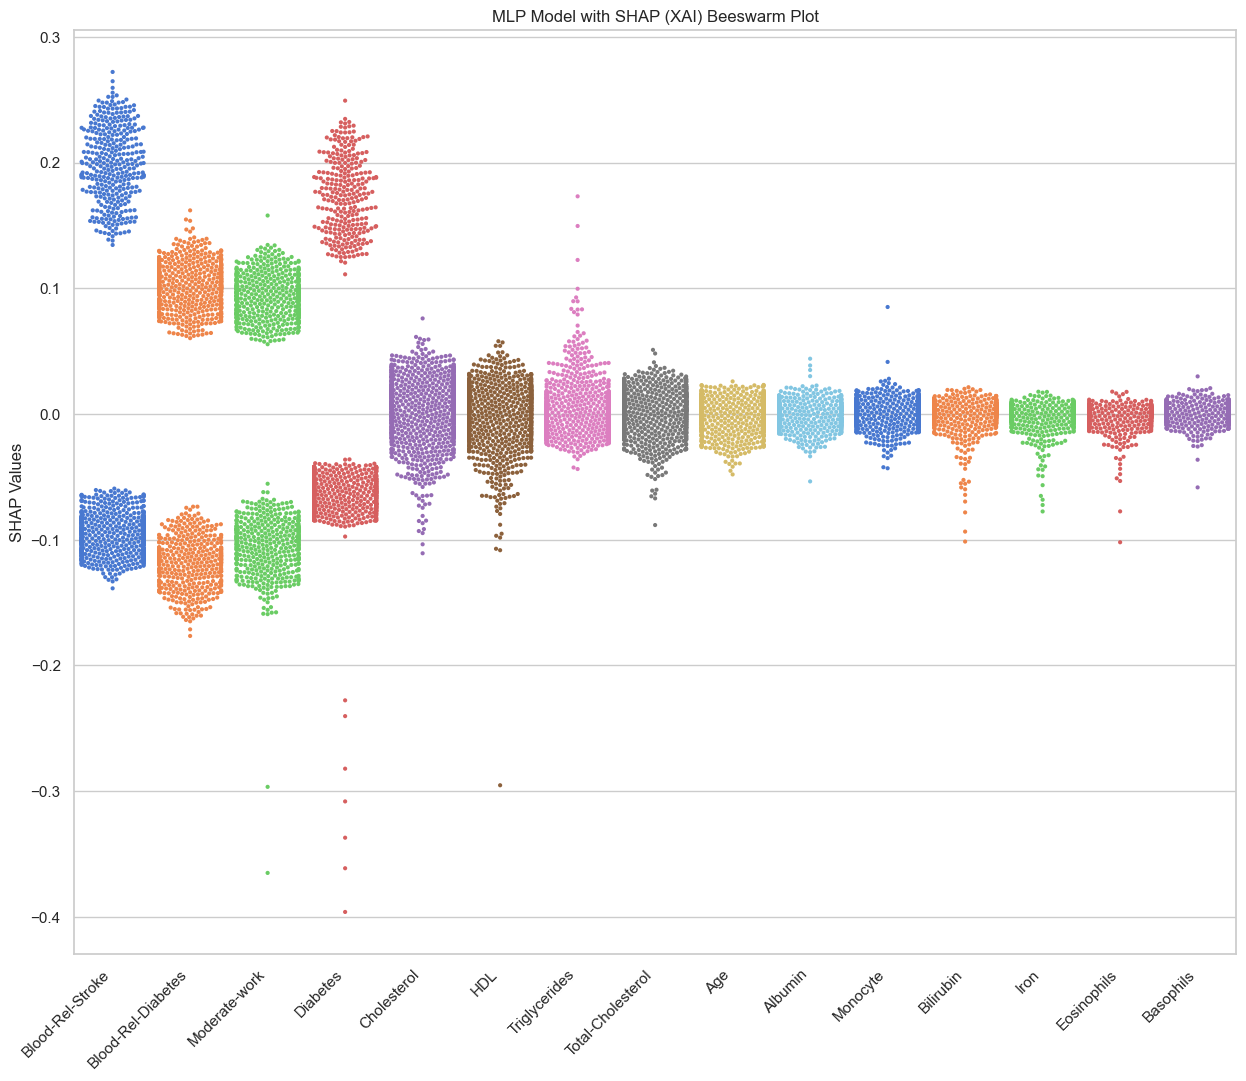

In [44]:

#  swarmplot (Beeswarm plot)
plt.figure(figsize=(15, 12))
sns.swarmplot(data=df_top_10, palette="muted", size=3) 
plt.title('MLP Model with SHAP (XAI) Beeswarm Plot')
plt.ylabel('SHAP Values')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Beeswarmplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()
